# Homework 4: Can you predict the Midterm Elections?

Due: Monday, November 3, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW4.ipynb download=HW4.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work. For the competition (problem 4), we will post a link on Piazza to a Google Form for you to submit your predictions. 


---


## Introduction

**Add Introduction**

You will use the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to extract the polls for the current 2014 Senate Midterm Elections and provide a final prediction of the result of each state.

#### Data

We will use the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api). 

---

## Problem 1: Data Wrangling

We will read in the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) and create a dictionary of DataFrames as well a master table information for each race.

#### Problem 1(a)

Read in [this JSON object](http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate) containing the polls for the 2014 Senate Elections using the HuffPost API. Call this JSON object `info`.  This JSON object is imported as a list in Python where each element contains the information for one race.  Use the function `type` to confirm the that `info` is a list. 

In [109]:
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

%matplotlib inline

In [41]:
url = 'http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate'
r = requests.get(url)
info = r.json()
print len(info)
info[2]

36


{u'election_date': u'2014-11-04',
 u'estimates': [],
 u'id': 569,
 u'last_updated': u'2016-06-06T14:37:55.000Z',
 u'poll_count': 4,
 u'short_title': u'2014 Rhode Island Senate: Zaccaria vs. Reed',
 u'slug': u'2014-rhode-island-senate-zaccaria-vs-reed',
 u'state': u'RI',
 u'title': u'2014 Rhode Island Senate: Zaccaria vs. Reed',
 u'topic': u'2014-senate',
 u'url': u'http://elections.huffingtonpost.com/pollster/2014-rhode-island-senate-zaccaria-vs-reed'}

#### Problem 1(b)

For each element of the list in `info` extract the state. We should have one poll per state, but we do not. Why?

**Hint**: Use the internet to find out information on the races in each state that has more than one entry. Eliminate entries of the list that represent races that are not happening.

In [65]:
ids = [422, 567, 531]
info_filtered = [x for x in info if not x['id'] in ids]
len(info_filtered)
info_filtered

[{u'election_date': u'2014-11-04',
  u'estimates': [{u'choice': u'Coons',
    u'first_name': u'Chris',
    u'incumbent': True,
    u'last_name': u'Coons',
    u'lead_confidence': 99.9,
    u'party': u'Dem',
    u'value': 56.0},
   {u'choice': u'Wade',
    u'first_name': u'Kevin',
    u'incumbent': False,
    u'last_name': u'Wade',
    u'lead_confidence': 0.0,
    u'party': u'Rep',
    u'value': 34.0}],
  u'id': 571,
  u'last_updated': u'2016-06-06T14:37:54.000Z',
  u'poll_count': 5,
  u'short_title': u'2014 Delaware Senate: Wade vs. Coons',
  u'slug': u'2014-delaware-senate-wade-vs-coons',
  u'state': u'DE',
  u'title': u'2014 Delaware Senate: Wade vs. Coons',
  u'topic': u'2014-senate',
  u'url': u'http://elections.huffingtonpost.com/pollster/2014-delaware-senate-wade-vs-coons'},
 {u'election_date': u'2014-11-04',
  u'estimates': [{u'choice': u'Markey',
    u'first_name': u'Ed',
    u'incumbent': True,
    u'last_name': u'Markey',
    u'lead_confidence': 99.9,
    u'party': u'Dem',
  

** Your answer here: **

#### Problem 1(c)

Create a dictionary of pandas DataFrames called `polls` keyed by the name of the election (a string). Each value in the dictionary should contain the polls for one of the races.

In [29]:
polls = {x['title']: pd.read_csv(x['url']+'.csv') for x in info_filtered}

In [31]:
polls['2014 Alaska Senate: Sullivan vs. Begich']

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Begich,Sullivan,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-11-01,2014-11-02,2014-11-03T12:13:22Z,1052,Likely Voters,IVR/Online,45.0,46.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,Rasmussen,2014-10-27,2014-10-30,2014-10-31T22:16:55Z,887,Likely Voters,IVR/Online,42.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
2,Moore (R-Sullivan For U.S. Senate),2014-10-26,2014-10-28,2014-10-29T22:53:09Z,500,Likely Voters,Live Phone,38.0,42.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://thehill.com/blogs/ballot-box/senate-rac...,Pollster,Rep,NaN,1
3,Ivan Moore,2014-10-24,2014-10-26,2014-10-28T11:12:37Z,544,Likely Voters,Live Phone,48.0,42.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://www.facebook.com/ivan.moore.58/posts/1...,Pollster,Dem,NaN,1
4,CBS/NYT/YouGov,2014-10-16,2014-10-23,2014-10-26T14:47:01Z,561,Likely Voters,Internet,44.0,48.0,9.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2014/09/07/2014-...,Nonpartisan,None,NaN,1
5,Harstad (D-Senate Majority PAC/Put Alaska First),2014-10-18,2014-10-22,2014-10-24T16:59:52Z,700,Likely Voters,Live Phone,44.0,44.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.senatemajority.com/wpress/wp-conten...,Pollster,Dem,NaN,1
6,Hellenthal,2014-10-15,2014-10-21,2014-10-24T22:16:34Z,403,Likely Voters,Live Phone,49.0,39.0,6.0,http://elections.huffingtonpost.com/pollster/p...,https://www.scribd.com/doc/244305469/AK-Sen-AK...,Pollster,Other,NaN,1
7,Rasmussen,2014-10-08,2014-10-12,2014-10-14T22:21:17Z,700,Likely Voters,IVR/Online,45.0,48.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
8,FOX,2014-10-04,2014-10-07,2014-10-08T22:17:05Z,706,Likely Voters,Live Phone,40.0,44.0,10.0,http://elections.huffingtonpost.com/pollster/p...,http://www.foxnews.com/politics/interactive/20...,Nonpartisan,None,NaN,1
9,CNN,2014-10-01,2014-10-06,2014-10-09T12:25:50Z,704,Likely Voters,Live Phone,44.0,50.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://i2.cdn.turner.com/cnn/2014/images/10/08...,Nonpartisan,None,NaN,1


#### Problem 1(d)

Now create a master table information containing information about each race. Create a pandas DataFrame called `candidates` with rows containing information about each race. The `candidates` DataFrame should have the following columns: 

1. `State` = the state where the race is being held
2. `R` = name of republican candidate
3. `D` = name of non-republican candidate (Democrate or Independent) 
4. `incumbent` = R, D or NA

**Hint**: You will need a considerable amount of data wrangling for this.

In [80]:
temp_list = []
for x in info_filtered:
    state = x['state']
    R = ''
    D = ''
    incumbent = 'NA'
    if len(x['estimates']) > 0:
        for can in x['estimates'][:2]:
            if can['party'] == 'Rep':
                R = can['choice']
                if can['incumbent']:
                    incumbent = 'R'
            else:
                D = can['choice']
                if can['party'] == 'Dem' and can['incumbent']:
                    incumbent = 'D'
    else:
        left, right = x['title'].split('vs.')
        R = left.split()[-1]
        D = right = right.split()[0]
                
    temp_list.append([state, R, D, incumbent])
    
candidates = pd.DataFrame(temp_list, columns=['state', 'R', 'D', 'incumbent'])
candidates

,state,R,D,incumbent
0,DE,Wade,Coons,D
1,MA,Herr,Markey,D
2,RI,Zaccaria,Reed,NA
3,MT,Daines,Curtis,NA
4,HI,Cavasso,Schatz,D
5,KS,Roberts,Orman,R
6,WY,Enzi,Hardy,R
7,TN,Alexander,Ball,R
8,ID,Risch,Mitchell,R
9,NJ,Bell,Booker,D


## Problem 2: Confidence Intervals

Compute a 99% confidence interval for each state. 

#### Problem 2(a)

Assume you have $M$ polls with sample sizes $n_1, \dots, n_M$. If the polls are independent, what is the average of the variances of each poll if the true proportion is $p$?

** Your answer here: **

This is a Bernoulli distribution.
Check - http://stats.stackexchange.com/questions/87730/why-do-political-polls-have-such-large-sample-sizes

We asume that the polls are unbiased, so p (probability of voting for Reps is the same in each poll).

The variance of a single poll with sample $n_i$ is $Var(X_i) = \frac{p(1-p)}{n_i}$. Therefore, the average of the variances across $M$ polls is

$$ \frac{1}{M} \sum_{i=1}^M Var( {X}_i) = \frac{1}{M} p(1-p)(1/n_1 + \dots +1/n_M) $$

#### Problem 2(b)

Compute the square root of these values in Problem 2(a) for the republican candidates in each race. Then, compute the standard deviations of the observed poll results for each race. 

In [117]:
def calculate(last_days=None):
    theory_std = []
    true_std = []
    n_polls = []

    for num, race in enumerate(info_filtered):
        # Get race name and the candidates
        name = race['title']
        can = candidates.ix[num]

        # To calculate p I adjusted values for the undecided to get Bernoulli distribution
        state_polls = polls[name]
        
        if last_days is not None:
            day_diff = state_polls['End Date'].apply(lambda x: (dt.datetime(2014, 11, 3) - 
                                                                dt.datetime.strptime(x, '%Y-%m-%d')).days)
            state_polls = state_polls.ix[day_diff <= last_days, :]
            
        rep = state_polls[can.R]
        dem = state_polls[can.D]
        # Normally would be * 100.0, but then we need to divide by 100 to get from 0 to 1
        p = rep / (rep + dem)
        n = state_polls['Number of Observations']

        # If polls are unbiased we can take the mean and calculate std from there
        p_mean = np.mean(p)
        n_mean = np.mean(n)

        theory_std.append(np.sqrt(p_mean * (1 - p_mean) / n_mean))
        true_std.append(np.std(p))
        n_polls.append(len(p))
        
    return theory_std, true_std, n_polls

theory_std, true_std, n_polls = calculate()

#### Problem 2(c) 

Plot observed versus theoretical (average of the theoretical SDs) with the area of the point proportional to number of polls. How do these compare?

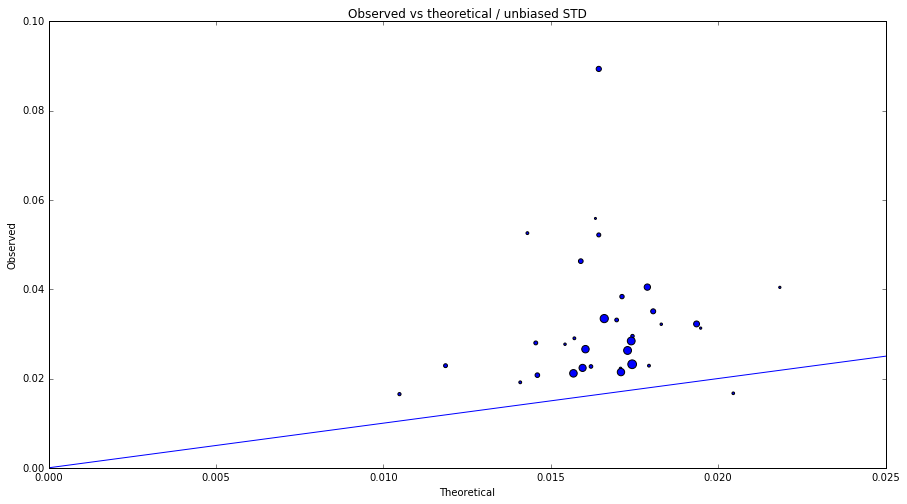

In [118]:
plt.figure(figsize=(15, 8))
plt.title('Observed vs theoretical / unbiased STD')
plt.xlabel('Theoretical')
plt.ylabel('Observed')
plt.ylim([0, 0.1])
plt.xlim([0, 0.025])
plt.scatter(theory_std, true_std, s=n_polls)
plt.plot((0,1), (0,1))
plt.show()

** Your answer here: **

#### Problem 2(d)

Repeat Problem 2(c) but include only the most recent polls from the last two months. Do they match better or worse or the same? Can we just trust the theoretical values?

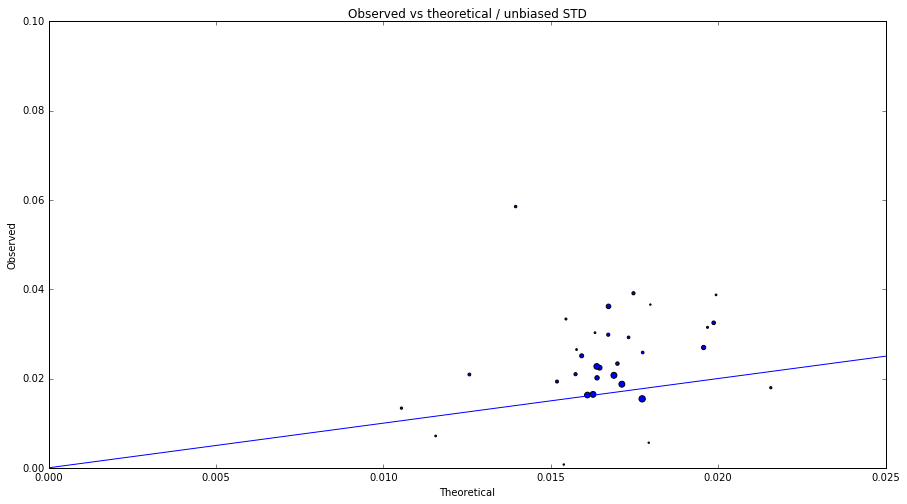

In [119]:
theory_std, true_std, n_polls = calculate(60)
plt.figure(figsize=(15, 8))
plt.title('Observed vs theoretical / unbiased STD')
plt.xlabel('Theoretical')
plt.ylabel('Observed')
plt.ylim([0, 0.1])
plt.xlim([0, 0.025])
plt.scatter(theory_std, true_std, s=n_polls)
plt.plot((0,1), (0,1))
plt.show()

** Your answer here: **

#### Problem 2(e)

Create a scatter plot with each point representing one state. Is there one or more races that are outlier in that it they have much larger variabilities than expected ? Explore the original poll data and explain why the discrepancy?

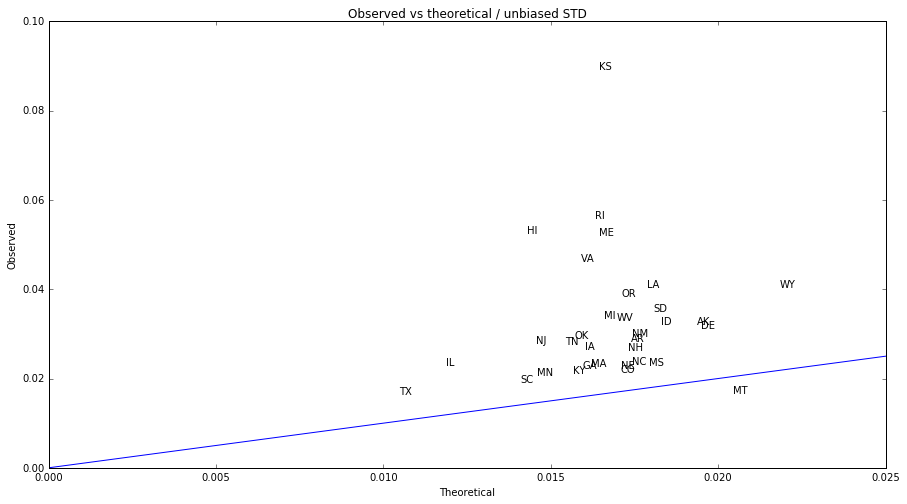

In [123]:
theory_std, true_std, n_polls = calculate()
plt.figure(figsize=(15, 8))
plt.title('Observed vs theoretical / unbiased STD')
plt.xlabel('Theoretical')
plt.ylabel('Observed')
plt.ylim([0, 0.1])
plt.xlim([0, 0.025])
# plt.scatter(theory_std, true_std, s=n_polls)
for i in range(len(theory_std)):
    plt.text(theory_std[i], true_std[i], candidates.ix[i, 'state'])
plt.plot((0,1), (0,1))
plt.show()

** Your answer here: **

#### Problem 2(f)

Construct confidence intervals for the difference in each race. Use either theoretical or data driven estimates of the standard error depending on your answer to this question. Use the results in Problem 2(e), to justify your choice.


In [126]:
def confidence():
    result = []

    for num, race in enumerate(info_filtered):
        # Get race name and the candidates
        name = race['title']
        can = candidates.ix[num]

        # To calculate p I adjusted values for the undecided to get Bernoulli distribution
        state_polls = polls[name]
            
        rep = state_polls[can.R]
        dem = state_polls[can.D]
        # Normally would be * 100.0, but then we need to divide by 100 to get from 0 to 1
        p = rep * 100.0 / (rep + dem)
        q = dem * 100.0 / (rep + dem)
        diffs = p - q
        n = len(p)

        se = np.std(diffs) / np.sqrt(n)
        mean = np.mean(diffs)
        
        result.append([name, mean, se])
        
    return result

confidence_df = pd.DataFrame(confidence(), columns=['name', 'mean', 'se'])

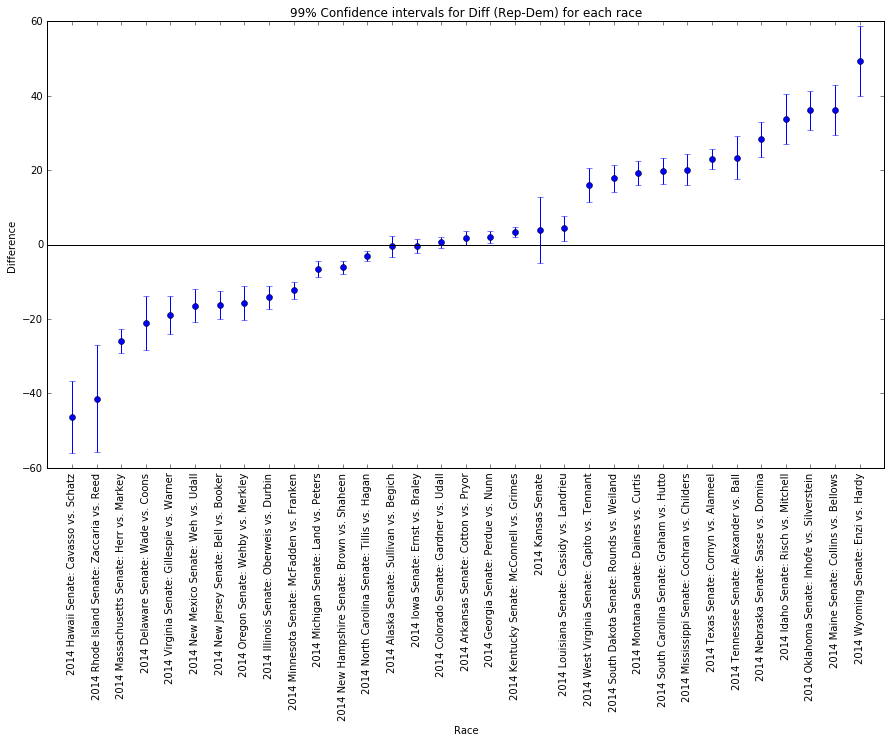

In [130]:
confidence_df = confidence_df.sort_values('mean')
plt.figure(figsize=(15, 8))
plt.errorbar(range(confidence_df.shape[0]), confidence_df['mean'], yerr=confidence_df['se']*2.58, fmt='o')
plt.xticks(range(confidence_df.shape[0]), confidence_df['name'].values, rotation=90)
plt.xlim(-1, confidence_df.shape[0])
plt.axhline(0, linewidth=1, color='black')
plt.xlabel("Race")
plt.ylabel("Difference")
plt.title("99% Confidence intervals for Diff (Rep-Dem) for each race")
plt.show()

# Problem 3: Prediction and Posterior Probabilities

Perform a Bayesian analysis to predict the probability of Republicans winning in each state then provide a posterior distribution of the number of republicans in the senate.

#### Problem 3(a)

First, we define a Bayesian model for each race. The prior for the difference $\theta$ between republicans and democtrats will be $N(\mu,\tau^2)$. Say before seeing poll data you have no idea who is going to win, what should $\mu$ be? How about $\tau$, should it be large or small? 

** Your answer here: **

Having no knowledge, we should assign $\mu = 0$ and $\theta$ to be very small.

#### Problem 3(b)

What is the distribution of $d$ conditioned on $\theta$. What is the posterior distribution of $\theta | d$? 

**Hint**: Use normal approximation. 

**Your answer here:**

$d \mid \theta \sim N(\theta, \sigma^2/M)$. We assume that $\sigma^2$ is known based on the observed sample variance, and $M$ is the number of polls averaged together to obtain $d$.

$\theta \mid d \sim N\left(B\mu + (1-B)d, (1-B)\sigma^2/M\right)$, where $B = \frac{1/\tau^2}{M/\sigma^2 + 1/\tau^2}$. (Note that there are lots of equivalent ways to write $B$, but this one shows that it is a *precision weight*, based on the ratio of the prior precision to the total precision of the prior and the data. Precision here is the inverse of the variance).

Equivalently, $\theta | d$ is $\theta | d \sim N( B \mu + (1-B) d, 1/(M/\sigma^2 + 1/ \tau^2))$.

#### Problem 3(c)

The prior represents what we think before hand. We do not know who is expected to win, so we assume $\mu=0$. For this problem estimate $\tau$ using the observed differences across states (Hint: $\tau$ represents the standard deviation of a typical difference). Compute the posterior mean for each state and plot it against original average. Is there much change? Why or why not? 

In [138]:
tau = np.std(confidence_df['mean'])
M = 1
B = (1/tau**2) / (M/confidence_df['se']**2 + 1/tau**2)

# Only second term as mu = 0
confidence_df['mu_post'] = (1-B) * confidence_df['mean']

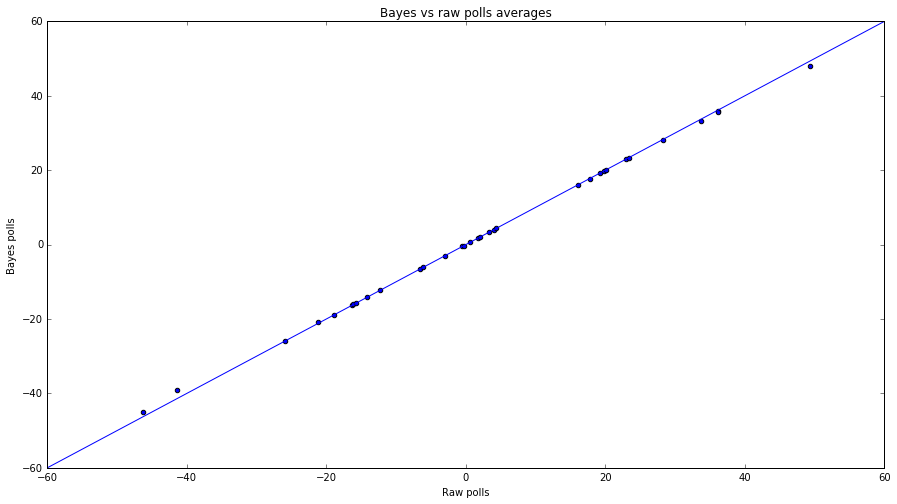

In [146]:
plt.figure(figsize=(15, 8))
plt.scatter(confidence_df['mean'], confidence_df['mu_post'])
# Copy the limits to cut off the straight line
limy = plt.ylim()
limx = plt.xlim()
plt.plot((-100, 100), (-100, 100))
plt.ylim(limy)
plt.xlim(limx)
plt.title('Bayes vs raw polls averages')
plt.ylabel('Bayes polls')
plt.xlabel('Raw polls')
plt.show()

**Your answer here:**

#### Problem 3(d)

For each state, report a probabilty of Republicans winning. How does your answer here compare to the other aggregators?

In [162]:
confidence_df['sd_post'] = np.sqrt((1-B)*confidence_df['se']**2)

import scipy.stats
from math import ceil

confidence_df['reps_win_chance'] = (1 - 
            scipy.stats.norm.cdf(0, loc=confidence_df['mu_post'], scale=confidence_df['sd_post']))

In [163]:
confidence_df[['name', 'reps_win_chance']].sort_values('reps_win_chance')

,name,reps_win_chance
4,2014 Hawaii Senate: Cavasso vs. Schatz,0.000000e+00
28,2014 New Hampshire Senate: Brown vs. Shaheen,0.000000e+00
14,2014 Minnesota Senate: McFadden vs. Franken,0.000000e+00
19,2014 Oregon Senate: Wehby vs. Merkley,0.000000e+00
9,2014 New Jersey Senate: Bell vs. Booker,0.000000e+00
23,2014 Illinois Senate: Oberweis vs. Durbin,0.000000e+00
25,2014 Virginia Senate: Gillespie vs. Warner,0.000000e+00
1,2014 Massachusetts Senate: Herr vs. Markey,0.000000e+00
10,2014 New Mexico Senate: Weh vs. Udall,0.000000e+00
30,2014 Michigan Senate: Land vs. Peters,6.661338e-16


**Your answer here:**

#### Problem 3(e)

Use the posterior distributions in a Monte Carlo simulation to generate election results. In each simulation compute the total number of seats the Republican control. Show a histogram of these results.

In [180]:
num_states = confidence_df.shape[0]
nsim = 10000

# +30 because that's how many states they already have
simulation = np.array([int(30 + np.sum(np.random.normal(loc=confidence_df['mu_post'], 
                                   scale=confidence_df['sd_post'], size=num_states) > 0)) for _ in xrange(nsim)])

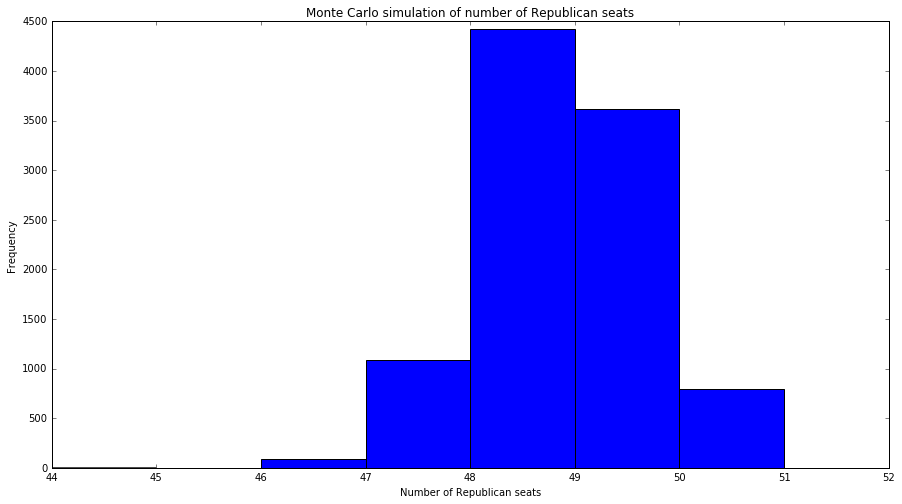

In [190]:
plt.figure(figsize=(15, 8))
plt.hist(simulation, bins=range(np.amin(simulation)-2, np.amax(simulation)+3))
plt.title('Monte Carlo simulation of number of Republican seats')
plt.xlabel('Number of Republican seats')
plt.ylabel('Frequency')
plt.show()

## Problem 4

Predict the results for the 2014 Midterm Elections. We will have a three competitions with the terms for scoring entries described above. For both questions below, **explain** or provide commentary on how you arrived at your predictions including code. 

**Hint**: Use election results from 2010, 2012 to build and test models.

#### Problem 4(a)

Predict the number of Republican senators. You may provide an interval. Smallest interval that includes the election day result wins. 

**Note**: we want the total so add the numbers of those that are not up for election.

In [192]:
mean_rep = np.mean(simulation)
std_rep = np.std(simulation)

print 'The interval is between', mean_rep - 2* std_rep, mean_rep + 2* std_rep

The interval is between 46.7617429715 50.0252570285


**Provide an explanation of methodology here**:

#### Problem 4(b)

Predict the R-D difference in each state. The predictions that minimize the residual sum of squares between predicted and observed differences wins.

In [197]:
confidence_df[['name', 'mu_post']]

,name,mu_post
4,2014 Hawaii Senate: Cavasso vs. Schatz,-45.061931
2,2014 Rhode Island Senate: Zaccaria vs. Reed,-38.970543
1,2014 Massachusetts Senate: Herr vs. Markey,-25.900353
0,2014 Delaware Senate: Wade vs. Coons,-20.801792
25,2014 Virginia Senate: Gillespie vs. Warner,-18.809110
10,2014 New Mexico Senate: Weh vs. Udall,-16.285883
9,2014 New Jersey Senate: Bell vs. Booker,-16.080844
19,2014 Oregon Senate: Wehby vs. Merkley,-15.623883
23,2014 Illinois Senate: Oberweis vs. Durbin,-14.127074
14,2014 Minnesota Senate: McFadden vs. Franken,-12.269120


**Provide an explanation of methodology here**:

#### Problem 4(c)

Report a confidence interval for the R-D difference in each state. If the election day result falls outside your confidence interval in more than two states you are eliminated. For those surviving this cutoff, we will add up the size of all confidence intervals and sum. The smallest total length of confidence interval wins. 

**Note**: you can use Bayesian credible intervals or whatever else you want. 

In [200]:
confidence_df['low'] = confidence_df['mu_post'] - 2*confidence_df['sd_post']
confidence_df['high'] = confidence_df['mu_post'] + 2*confidence_df['sd_post']
confidence_df[['name', 'low', 'high']]

,name,low,high
4,2014 Hawaii Senate: Cavasso vs. Schatz,-52.393444,-37.730418
2,2014 Rhode Island Senate: Zaccaria vs. Reed,-49.803086,-28.138001
1,2014 Massachusetts Senate: Herr vs. Markey,-28.414781,-23.385925
0,2014 Delaware Senate: Wade vs. Coons,-26.354933,-15.248650
25,2014 Virginia Senate: Gillespie vs. Warner,-22.741180,-14.877040
10,2014 New Mexico Senate: Weh vs. Udall,-19.682104,-12.889662
9,2014 New Jersey Senate: Bell vs. Booker,-18.963975,-13.197713
19,2014 Oregon Senate: Wehby vs. Merkley,-19.132109,-12.115657
23,2014 Illinois Senate: Oberweis vs. Durbin,-16.486456,-11.767692
14,2014 Minnesota Senate: McFadden vs. Franken,-14.078824,-10.459417


**Provide an explanation of methodology here**:

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
